# <center>Data Mining Project Code</center>

** **
## <center>*03 - Customer Segmentation Notebook*</center>

** **

Consumers today are becoming more selective about where they buy their products and where they spend their money. Consequently, it is essencial for companies to better understand their clients, being able to tailor sales and discounts to certain groups of customers.

Knowing this, the goal of this project is to divide customers of `ABCDEats Inc.` into smaller groups, whose clients have similar characteristics and purchasing behaviours.

The third and final notebook of this project consists of the implementation of different Clustering Models, attempting to group customers in a way that each client is similar to the other clients in the same group, but different from other groups. To perform this task, methods such as Hierarchical Clustering, K-Means and DBScan will be implemented.

This project was presented to the `TargetSphere Advisors`, a group of Consultants, Business Analysts and Data Scientists who focus on delivering Customer Segementation solutions for small and medium-sized businesses.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
 
    
2. [Variable Standardization](#2.-Variable-Standardization) <br><br>

    
3. [Customer Segmentation](#3.-Customer-Segmentation)

    3.1 [Hierarchical Clustering](#3.1-Hierarchical-Clustering) <br>
    
    3.2 [Partitioning Methods](#3.2-Partitioning-Methods) <br>


# 1. Importing Libraries & Data

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Scalers
from sklearn.preprocessing import RobustScaler

# Clustering algorithms
from sklearn.cluster import DBSCAN, HDBSCAN, MeanShift, OPTICS, KMeans, AgglomerativeClustering, estimate_bandwidth
from minisom import MiniSom
from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics
from sklearn.metrics import confusion_matrix

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from matplotlib import cm, colors as mpl_colors, colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# change data file
data = pd.read_csv('data/DM2425_ABCDEats_DATASET.csv', index_col = "customer_id")
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0


# 2. Variable Standardization

<a href="#top">Top &#129033;</a>

In [6]:
## TEMP

num_data = data.select_dtypes(include=['number'])
num_data = num_data.dropna()
num_data.head(3)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.0,2,5,1,0.0,1,0.00,0.00,0.0,0.0,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,17.0,2,2,2,0.0,1,12.82,6.39,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,38.0,1,2,2,0.0,1,9.20,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# experimentar todos scalers

scaled_data = RobustScaler().fit_transform(num_data)

# 3. Customer Segmentation

<a href="#top">Top &#129033;</a>

1. Partitioning Methods
- K-means
- K-medoids

2. Hierachical
- Agglomerative, Divisive
    - linkage(s)

3. Density-Based
- DBScan (HDBSCAN for varying densities)
- Meanshift
- OPTICS

4. Model-Based (?)
- Gaussian Mixture Models
- Hidden Markov Models

5. Neural Network-based
- SOMs

6. Dimensionaility Reduction
- UMAP
- t-SNE

(future)
- PCA

7. Combos

## 3.1 Hierarchical Clustering

In [33]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

**Dendrogram**

In [38]:
def plot_dendrogram(model, **kwargs):
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments: 
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    
    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

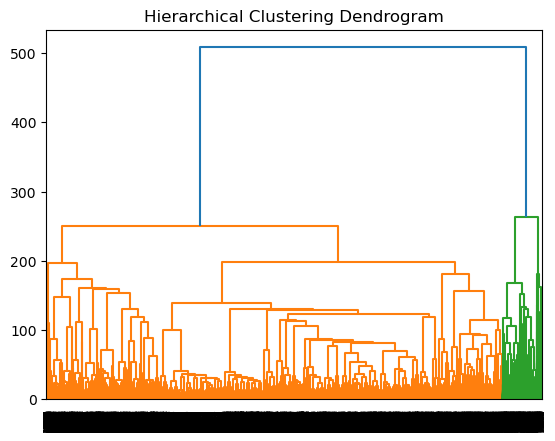

In [40]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
#plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()


# demora um bocado a correr com p=50

## 3.2 Partitioning Methods

### 3.2.1 K-Means

In [13]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

**Elbow Method**

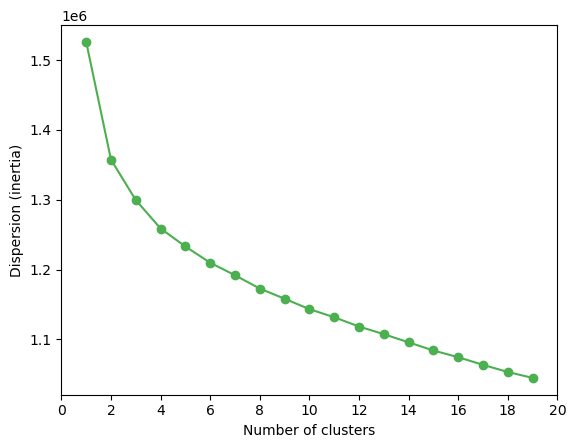

In [19]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

In [4]:
possible_k = [4, 5, 6, 7, 8]

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_data)  
    clusters  = kmeans.predict(scaled_data)  
    
    num_data[f'cluster_kmeans{k}'] = clusters 
    
    num_data.groupby([f'cluster_kmeans{k}']).size().plot(kind='bar', 
                                                          color='#4CAF50') 
    plt.title(f'Cluster Sizes for k={k}')
    plt.show()

In [9]:
for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_data)  
    clusters  = kmeans.predict(scaled_data)  
    
    num_data[f'cluster_kmeans{k}'] = clusters 
    
    print(f"Mean values for k={k}:")
    
    print(num_data.groupby([f'cluster_kmeans{k}']).mean().T)
    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=4:
cluster_kmeans4                   0          1          2          3
customer_age              27.485326  27.550035  27.530945  27.838373
vendor_count               2.757431   3.966410   4.238871   8.153285
product_count              4.548194   8.604619  12.345277  21.354536
is_chain                   2.475029   2.461162   3.313789  10.523462
first_order               29.969298  26.051085  15.547231  13.016684
last_order                62.383037  67.853744  76.256243  79.794578
CUI_American               4.300152   5.599349   9.708947  10.262471
CUI_Asian                  8.717523  22.537299   4.614886   9.255349
CUI_Beverages              2.192513   3.895878   0.019555   3.032211
CUI_Cafe                   0.488144   0.017110   2.610489   8.652993
CUI_Chicken Dishes         0.743364   0.005626   0.472552   2.240365
CUI_Chinese                1.201851   0.975794   0.912595   7.156194
CUI_Desserts               0.764288   2.728265   0.012997   0.653785
CUI_Healthy  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=5:
cluster_kmeans5                   0          1          2          3  \
customer_age              27.489192  27.920925  27.553016  27.379553   
vendor_count               2.709260   7.956204   4.130713   4.238543   
product_count              4.409061  20.935523   9.357404  12.620447   
is_chain                   2.421217  10.362530   2.573126   3.359577   
first_order               30.176797  13.345499  25.031079  15.259694   
last_order                62.064574  79.153285  68.739488  76.319624   
CUI_American               4.220220  10.779659   5.871856   9.707051   
CUI_Asian                  8.526820   8.586582  23.617834   4.538813   
CUI_Beverages              2.206261   3.166910   4.169863   0.009730   
CUI_Cafe                   0.493765   7.909818   0.022349   2.914571   
CUI_Chicken Dishes         0.758710   2.214197   0.007349   0.511422   
CUI_Chinese                1.229144   6.748808   1.004287   0.881727   
CUI_Desserts               0.759506   0.599

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=6:
cluster_kmeans6                   0          1          2           3  \
customer_age              27.471758  27.648090  27.878860   27.744186   
vendor_count               2.710006   3.508453   7.927553    5.497674   
product_count              4.398974   6.772073  20.739905   15.488372   
is_chain                   2.441326   2.073262  10.282660    3.837209   
first_order               30.148648  28.889793  13.423990   15.125581   
last_order                62.060154  65.903569  79.209026   72.967442   
CUI_American               4.223351   4.720657  10.517589    7.741116   
CUI_Asian                  8.365006  19.695905   8.423777   30.444837   
CUI_Beverages              2.154414   3.749211   3.116069    5.973814   
CUI_Cafe                   0.500534   0.043957   7.818622    0.067581   
CUI_Chicken Dishes         0.770500   0.008698   2.166105    0.000000   
CUI_Chinese                1.226015   0.850263   6.951152    1.628326   
CUI_Desserts               0.7

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=7:
cluster_kmeans7                   0          1          2           3  \
customer_age              27.477012  27.335351  27.938697   27.793427   
vendor_count               2.694674   4.123487   7.874840    5.535211   
product_count              4.320785  12.288136  20.425287   15.577465   
is_chain                   2.421105   3.219128  10.240102    3.854460   
first_order               30.285783  15.542373  13.472542   14.910798   
last_order                61.938406  76.145278  78.918263   73.051643   
CUI_American               4.224594   9.407131  10.671520    7.786808   
CUI_Asian                  8.433266   4.052022   7.920817   30.730704   
CUI_Beverages              2.188328   0.010024   3.141596    6.029906   
CUI_Cafe                   0.499123   2.816283   7.873065    0.068216   
CUI_Chicken Dishes         0.770972   0.520472   2.159221    0.000000   
CUI_Chinese                1.250063   0.879649   6.878046    1.643615   
CUI_Desserts               0.7

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=8:
cluster_kmeans8                   0          1          2           3  \
customer_age              27.733799  27.349879  27.639587   27.793427   
vendor_count               4.643071   4.128329   3.382979    5.535211   
product_count             10.409771  12.311138   6.519020   15.577465   
is_chain                   4.605184   3.222760   1.952934    3.854460   
first_order               22.292124  15.510896  29.357834   14.910798   
last_order                72.791625  76.156174  65.535139   73.051643   
CUI_American               7.285145   9.429007   4.510129    7.786808   
CUI_Asian                 15.662722   4.052022  19.018362   30.730704   
CUI_Beverages              1.378833   0.010024   2.250651    6.029906   
CUI_Cafe                   1.643908   2.816283   0.030110    0.068216   
CUI_Chicken Dishes         0.557318   0.520472   0.008956    0.000000   
CUI_Chinese                1.510239   0.879649   0.828736    1.643615   
CUI_Desserts               1.0

In [77]:
kmeans_labels = kmeans.fit_predict(umap_embedding) 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


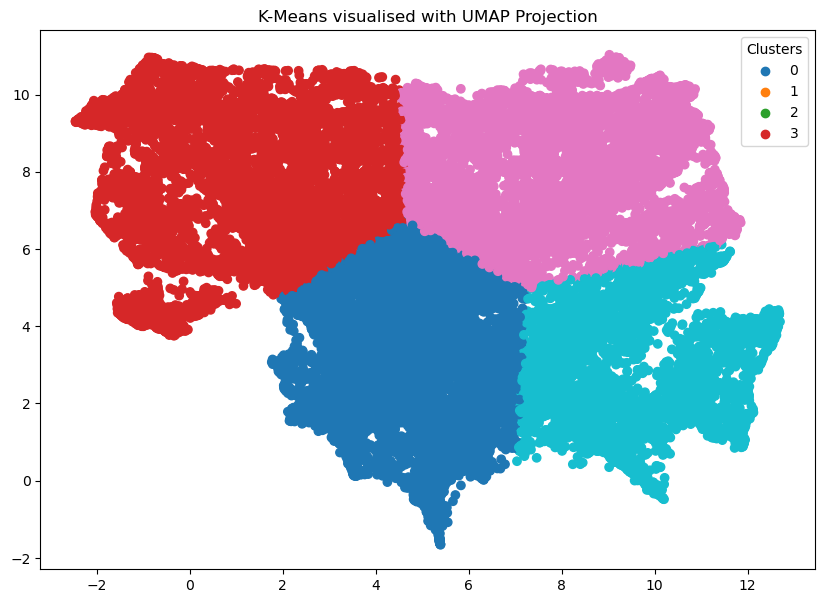

In [86]:
plot_dim_reduction(umap_embedding, targets = kmeans_labels,
                   technique = 'K-Means visualised with UMAP')

## 3.? Density-Based
- DBScan (HDBSCAN for varying densities)
- Meanshift
- OPTICS

### 3.?.1 DBScan

In [ ]:
dbscan = DBSCAN(eps=15, min_samples=5)  
num_data['dbscan_cluster_1'] = dbscan.fit_predict(scaled_data)
num_data['dbscan_cluster_1'].value_counts()

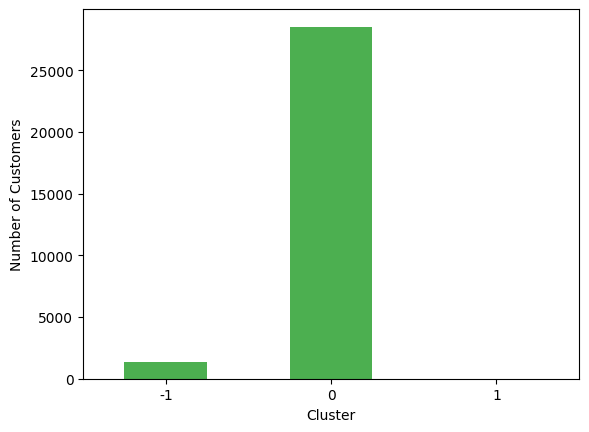

In [31]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_data.groupby(['dbscan_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

### 3.?.2 HDBScan

In [42]:
hdbscan = HDBSCAN(min_cluster_size=10)
num_data['hdbscan_cluster_1'] = dbscan.fit_predict(scaled_data)
num_data['hdbscan_cluster_1'].value_counts()

hdbscan_cluster_1
 0    28548
-1     1364
 1        8
Name: count, dtype: int64

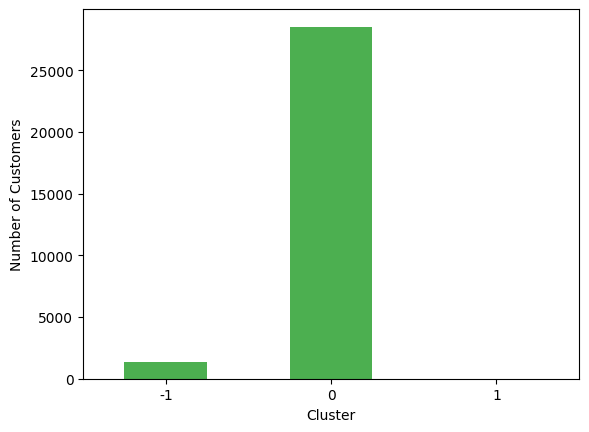

In [43]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_data.groupby(['hdbscan_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

### 3.?.3 Meanshift

In [6]:
meanshift = MeanShift(bin_seeding = True)
num_data['meanshift_cluster_1'] = meanshift.fit_predict(scaled_data)
num_data['meanshift_cluster_1'].value_counts()

meanshift_cluster_1
0      25384
230      487
181      362
6        236
51       207
       ...  
240        1
260        1
78         1
126        1
254        1
Name: count, Length: 286, dtype: int64

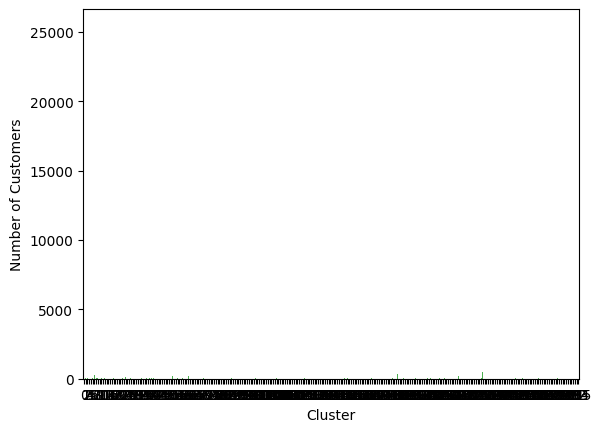

In [7]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_data.groupby(['meanshift_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

### 3.?.4 OPTICS

In [18]:
optics = OPTICS(min_samples=30)
num_data['optics_cluster_1'] = optics.fit_predict(scaled_data)
num_data['optics_cluster_1'].value_counts()

optics_cluster_1
-1    29784
 0      136
Name: count, dtype: int64

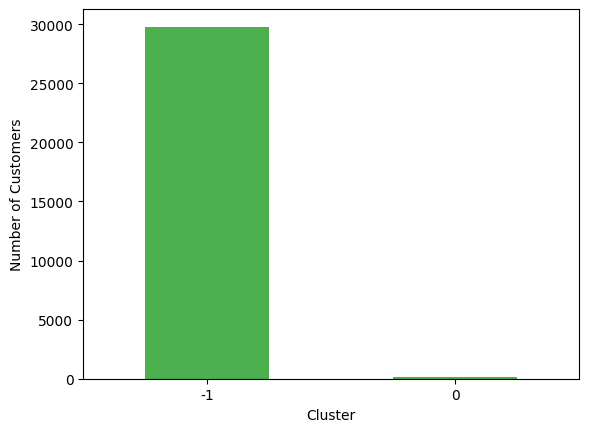

In [19]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = num_data.groupby(['optics_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

## 3.? Model-Based

<a href="#top">Top &#129033;</a>

In [104]:
from sklearn.mixture import GaussianMixture
#%pip install hmmlearn
from hmmlearn.hmm import GaussianHMM

### 3.?.1 Gaussian Mixture Models

In [94]:
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(num_data)

GaussianMixture(n_components=3)

In [101]:
labels = gmm.predict(num_data)

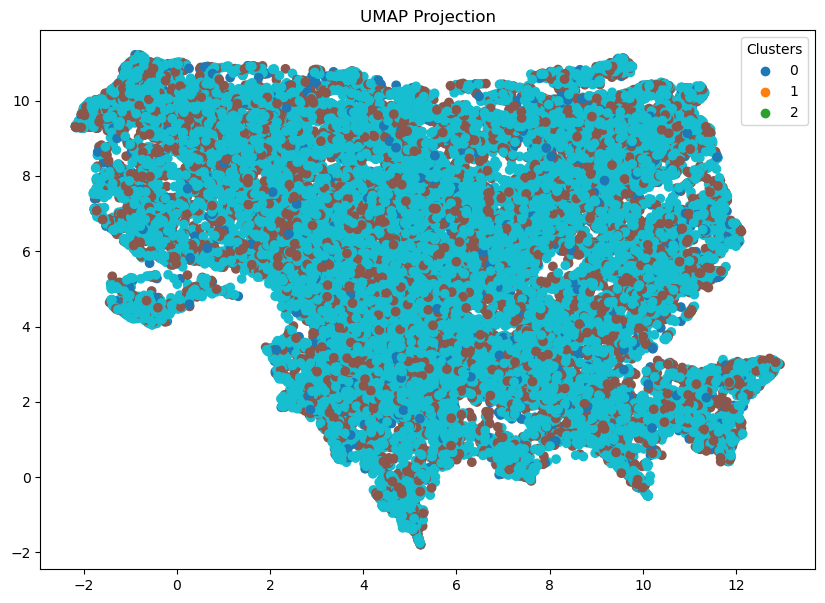

In [98]:
plot_dim_reduction(umap_embedding, targets=labels, technique='UMAP')

### 3.?.2 Hidden Markov Models

In [105]:
hmm = GaussianHMM(n_components=3, covariance_type='full')
hmm.fit(num_data)

Model is not converging.  Current: -2071749.9344433064 is not greater than -2020381.3105625827. Delta is -51368.623880723724


GaussianHMM(covariance_type='full', n_components=3)

In [109]:
hidden_states = hmm.predict(num_data)

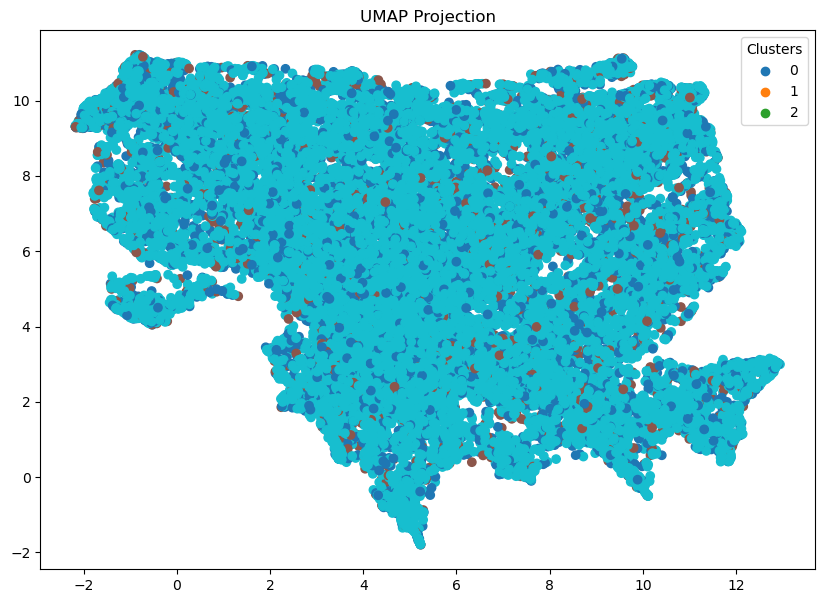

In [110]:
plot_dim_reduction(umap_embedding, targets = hidden_states, 
                   technique='UMAP')

## 3.? Neural Network-based

### 3.?.1 Self Organizing Maps (SOM)

In [22]:
# Training a Self-Organized Map with a 15 by 15 grid, using 52 features.
som = MiniSom(
    15, 
    15, 
    52,
    sigma=0.5,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

In [24]:
# Set the seed of Numpy just to be sure of replicability
np.random.seed(42)

num_iterations = 1000

q_errors = []
for i in range(1, num_iterations):
    som.train_batch(scaled_data, i)
    q_errors.append(som.quantization_error(scaled_data))

c:\Users\abdar\anaconda3\envs\DataMiningProject\Lib\site-packages\minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


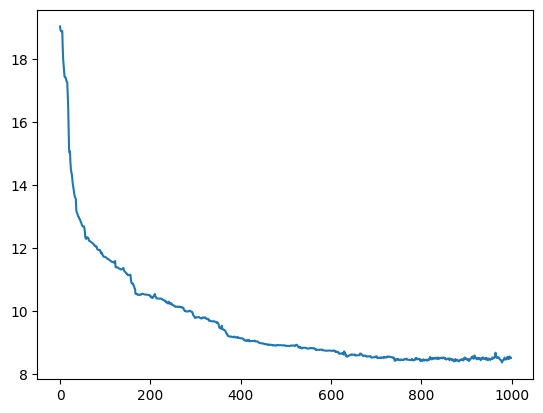

In [25]:
plt.plot(q_errors)

In [27]:
# Setting up the same som again and retraining it 
som = MiniSom(
    15, 15, 52, sigma=0.5, 
    learning_rate=1, neighborhood_function='gaussian', random_seed=42)
som.train(scaled_data, 800)

In [28]:
def plot_som_hexagons(som,
                      matrix,
                      cmap=cm.Blues,
                      figsize=(20,20),
                      annotate=True,
                      title="SOM Matrix",
                      cbar_label="Color Scale"
                ):

    xx, yy = som.get_euclidean_coordinates()

    f = plt.figure(figsize=figsize)
    ax = f.add_subplot(111)

    ax.set_aspect('equal')
    ax.set_title(title, fontsize=20)

    colornorm = mpl_colors.Normalize(vmin=np.min(matrix), 
                                     vmax=np.max(matrix))

    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wy = yy[(i, j)] * np.sqrt(3) / 2
            hexagon = RegularPolygon((xx[(i, j)], wy), 
                                 numVertices=6, 
                                 radius=.95 / np.sqrt(3),
                                 facecolor=cmap(colornorm(matrix[i, j])), 
                                 alpha=1)
            ax.add_patch(hexagon)

            if annotate:
                annot_vals = np.round(matrix[i, j],2)
                if annot_vals > 1:
                    annot_vals = int(annot_vals)
                
                ax.text(xx[(i, j)], wy, annot_vals, 
                        ha='center', va='center', 
                        fontsize=figsize[1], 
                        )

    ax.margins(.05)
    ax.axis("off")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])
    
    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="2%", pad=0)    
    cb1 = colorbar.ColorbarBase(ax_cb, 
                                orientation='vertical', 
                                alpha=1,
                                mappable=cmap_sm
                               )
    cb1.ax.get_yaxis().labelpad = 16
    cb1.ax.set_ylabel(cbar_label, fontsize=18)
    plt.gcf().add_axes(ax_cb)

    return plt

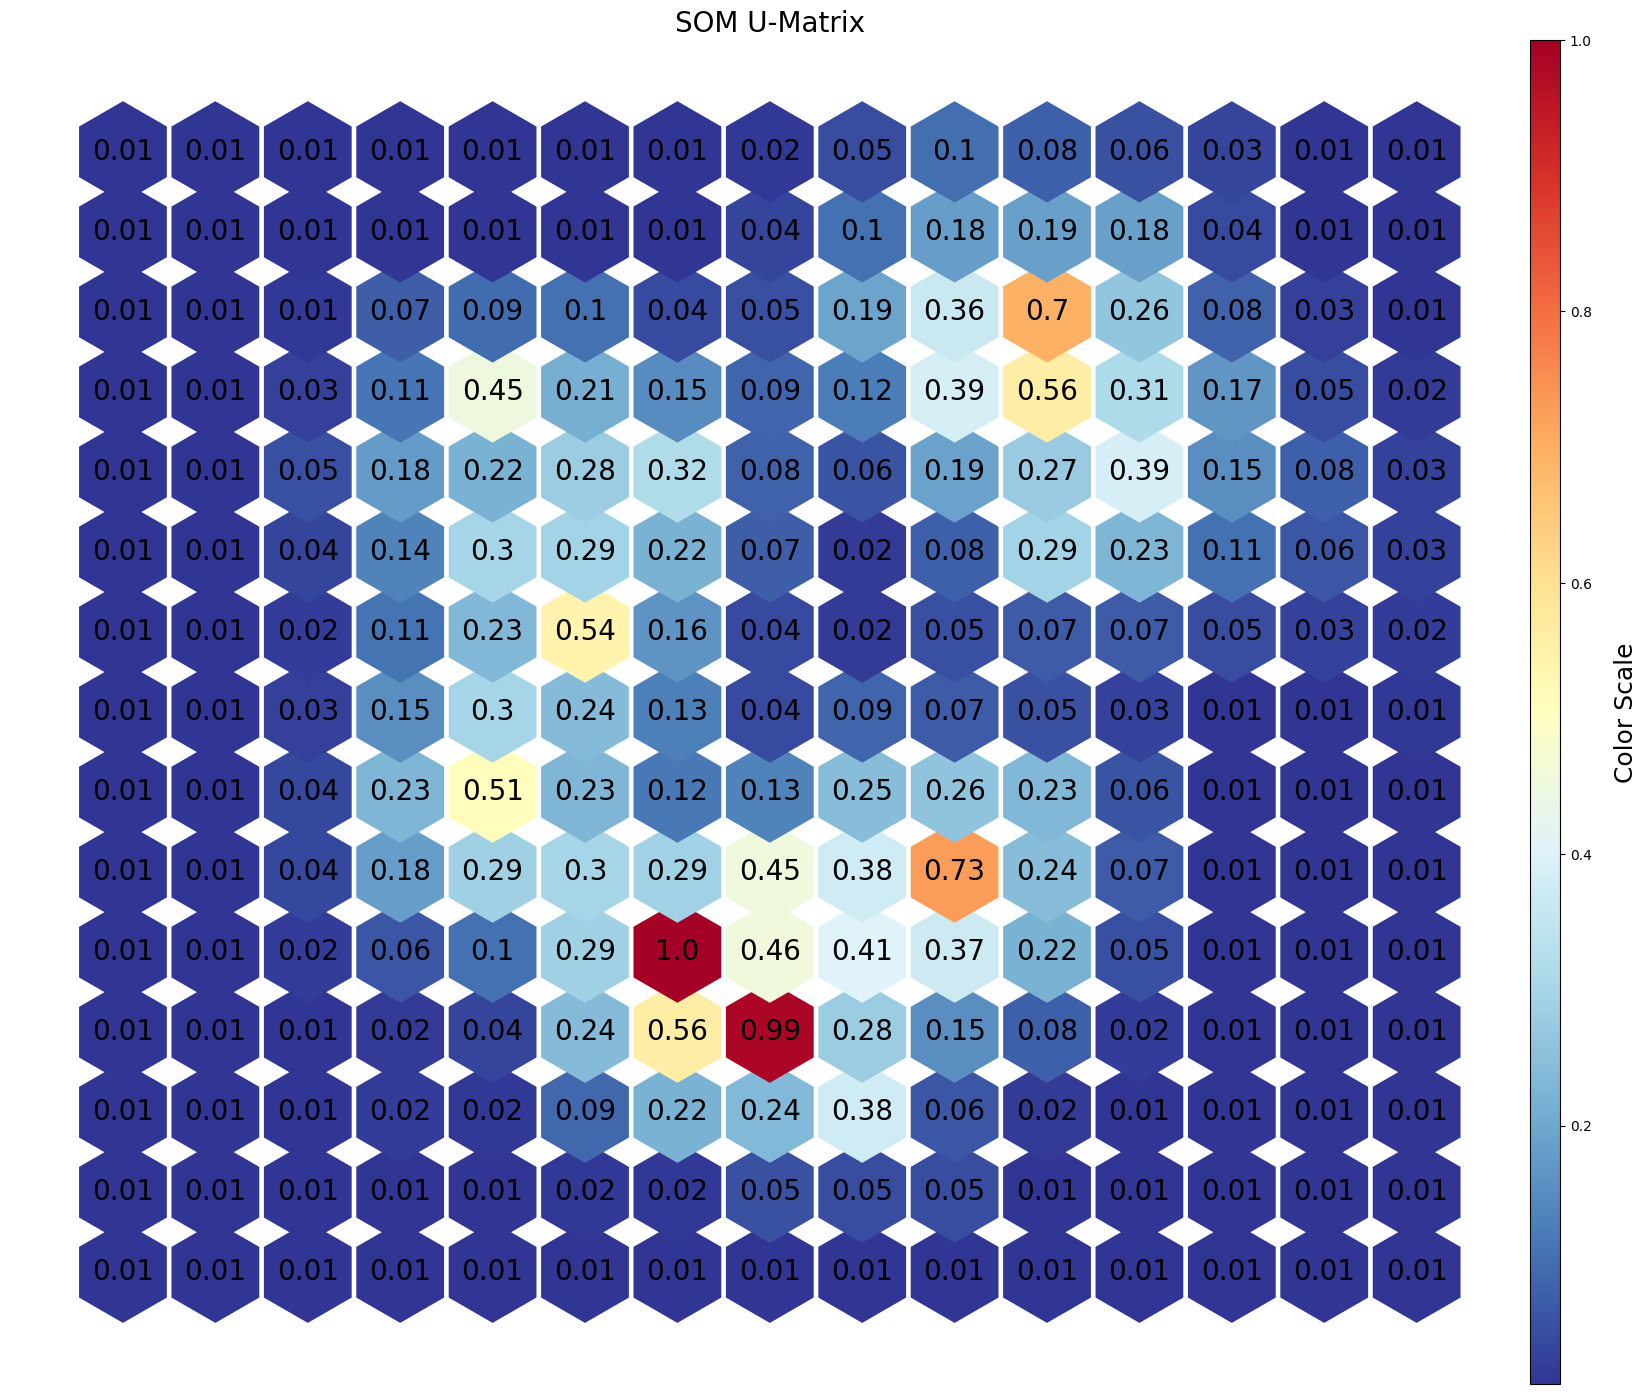

In [29]:
umatrix = som.distance_map(scaling='mean')

fig = plot_som_hexagons(som, umatrix, cmap=cm.RdYlBu_r, title="SOM U-Matrix")
plt.show()

## 3.? Dimensionality Reduction

<a href="#top">Top &#129033;</a>

In [53]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

### 3.?.1 UMAP

In [91]:
umap_object = umap.UMAP(n_neighbors=15, min_dist=0.1)

In [92]:
num_ordered = num_data.sort_index()

In [93]:
umap_embedding = umap_object.fit_transform(num_ordered)

In [85]:
def plot_dim_reduction(embedding, targets = None, 
                       technique = 'UMAP',
                       figsize = (10, 7)):
    
    plt.figure(figsize=figsize)
    
    if targets is not None:
        # Ensure targets are in integer format for color mapping
        labels = np.unique(targets)
        scatter = plt.scatter(
            embedding[:, 0], 
            embedding[:, 1], 
            c=np.array(targets).astype(int), 
            cmap='tab10'
        )

        # Create a legend with the class labels and colors
        handles = [plt.scatter([], [], color=plt.cm.tab10(i), label=label) for i, label in enumerate(labels)]
        plt.legend(handles=handles, title='Clusters')

        
    else:
        plt.scatter(embedding[:, 0], embedding[:, 1], s=5)

    if technique == 'UMAP':
        plt.title('UMAP Projection')
    elif technique == 't-SNE':
        plt.title('t-SNE Projection')
    else:
        plt.title(f'{technique} Projection')

    plt.show()


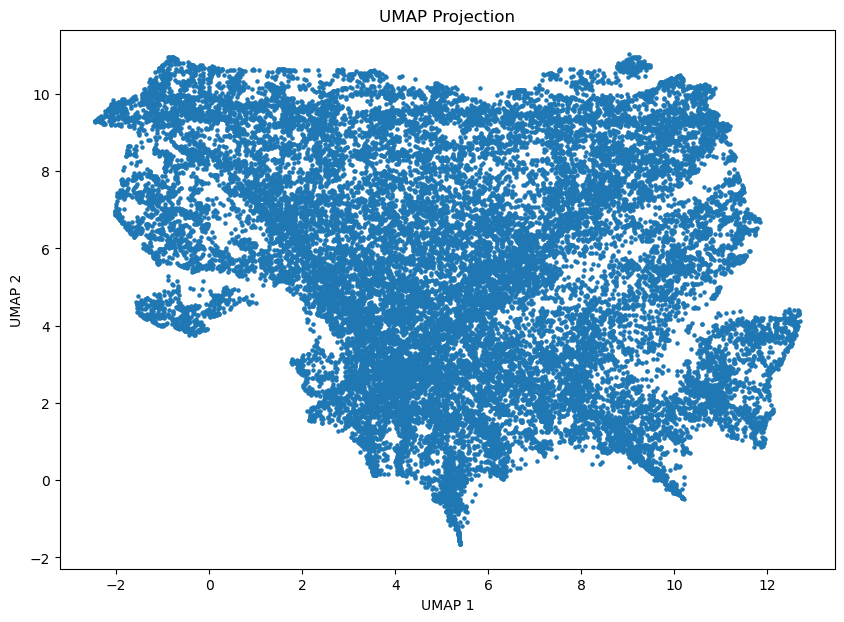

In [82]:
plot_dim_reduction(umap_embedding)

### 3.?.2 t-SNE

In [59]:
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)

In [66]:
tsne_embedding = tsne_model.fit_transform(num_data)

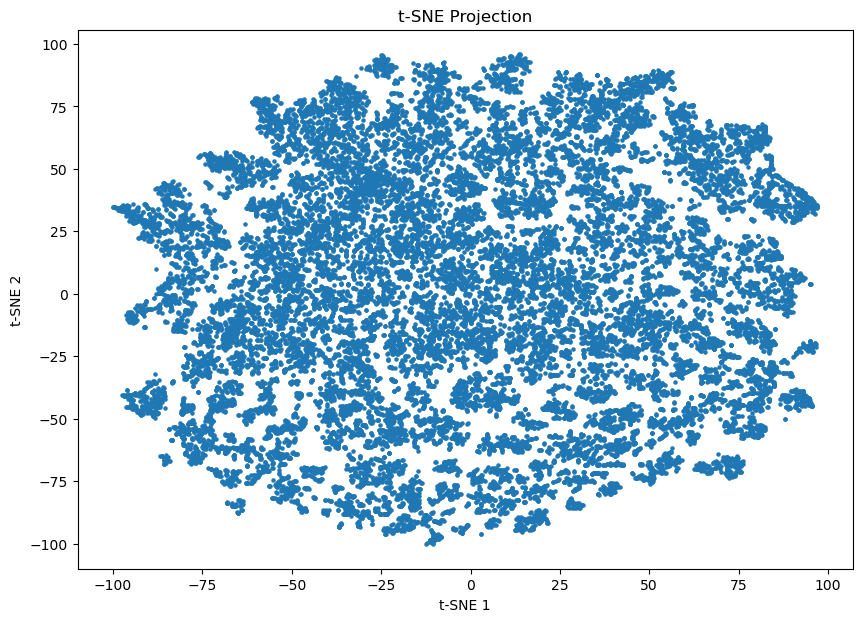

In [67]:
plot_dim_reduction(tsne_embedding, technique = 't-SNE')